# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Gun data

The data comes from the FBI's National Instant Criminal Background Check System https://www.fbi.gov/services/cjis/nics. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.
### Census data

The data comes from Census. Provides national population and housing unit per state.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [13]:
df_g = pd.read_csv('gun_data.csv')

In [14]:
# 1 data assessment, Gun data
df_g.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


In [15]:
df_g.shape

(12485, 27)

In [16]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [17]:
df_g.groupby('state').min().month #1998-11

state
Alabama                 1998-11
Alaska                  1998-11
Arizona                 1998-11
Arkansas                1998-11
California              1998-11
Colorado                1998-11
Connecticut             1998-11
Delaware                1998-11
District of Columbia    1998-11
Florida                 1998-11
Georgia                 1998-11
Guam                    1998-11
Hawaii                  1998-11
Idaho                   1998-11
Illinois                1998-11
Indiana                 1998-11
Iowa                    1998-11
Kansas                  1998-11
Kentucky                1998-11
Louisiana               1998-11
Maine                   1998-11
Mariana Islands         1998-11
Maryland                1998-11
Massachusetts           1998-11
Michigan                1998-11
Minnesota               1998-11
Mississippi             1998-11
Missouri                1998-11
Montana                 1998-11
Nebraska                1998-11
Nevada                  1998-11
Ne

In [18]:
df_g.groupby('state').max().month #2017-9

state
Alabama                 2017-09
Alaska                  2017-09
Arizona                 2017-09
Arkansas                2017-09
California              2017-09
Colorado                2017-09
Connecticut             2017-09
Delaware                2017-09
District of Columbia    2017-09
Florida                 2017-09
Georgia                 2017-09
Guam                    2017-09
Hawaii                  2017-09
Idaho                   2017-09
Illinois                2017-09
Indiana                 2017-09
Iowa                    2017-09
Kansas                  2017-09
Kentucky                2017-09
Louisiana               2017-09
Maine                   2017-09
Mariana Islands         2017-09
Maryland                2017-09
Massachusetts           2017-09
Michigan                2017-09
Minnesota               2017-09
Mississippi             2017-09
Missouri                2017-09
Montana                 2017-09
Nebraska                2017-09
Nevada                  2017-09
Ne

In [19]:
df_g.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [20]:
# 2 data assessment, Census data
df_c = pd.read_csv('US_Census_Data.csv')
df_c.shape

(85, 52)

In [21]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [22]:
df_c.head(1)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


# Data Cleaning 
#### Gun data is well-formatted. Narrow down the rows and columns for linking census data.

In [23]:
#split mont column into two different columns named as Yr and Mon respectively and add them to the existing df
df_g[['yr','mon']] = df_g.month.apply(lambda x: pd.Series(str(x).split("-")))
#convert object to int
df_g['yr'] = df_g['yr'].astype(int)
df_g['mon'] = df_g['mon'].astype(int)
#check result
df_g.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 29 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [24]:
# keep 1999-2016
df_g_1999_to_2016 = df_g.query('yr >= 1999 and yr <=2016')
df_g_1999_to_2016.yr.unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999], dtype=int64)

In [25]:
# keep 2016 data and group by state
df_g_temp = df_g.query('yr == 2016')
df_g_2016_by_state = df_g_temp.groupby('state')['totals'].sum().reset_index()
df_g_2016_by_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
state     55 non-null object
totals    55 non-null int64
dtypes: int64(1), object(1)
memory usage: 1008.0+ bytes


#### Census data is messy. Need to do
Drop unused column FactNote
Pivot
Rename Fact to state

In [26]:
df_c = df_c.drop('Fact Note', axis='columns')

In [27]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 51 columns):
Fact              80 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota         65 non-null object
Mississip

In [28]:
#Traspose the census dataframe
#https://stackoverflow.com/questions/47139203/transpose-pandas-dataframe-and-change-the-column-headers-to-a-list
df_c_t = df_c.set_index('Fact').T.rename_axis('state').rename_axis(None, axis=1)
df_c_t.head(5)

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
state,,,,,,,,,,,,,,,,,,,,,
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Create a dataframe has columns that contain 2016. Used to join df_g_2016
#https://stackoverflow.com/questions/21285380/find-column-whose-name-contains-a-specific-string
df_column_has_2016 = df_c_t.filter(regex='2016')

In [30]:
#Remove comma for column 'Population estimates, July 1, 2016,  (V2016)'
df_column_has_2016['Population estimates, July 1, 2016,  (V2016)']=df_column_has_2016['Population estimates, July 1, 2016,  (V2016)'].replace({',':''},regex=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
#Change its data tpye from object to int
df_column_has_2016['Population estimates, July 1, 2016,  (V2016)']=df_column_has_2016['Population estimates, July 1, 2016,  (V2016)'].apply(pd.to_numeric)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
# remove index on state column
df_column_has_2016 = df_column_has_2016.reset_index()

In [33]:
#sum df_g_2016 by state
#df_g_2016_sum = df_g_2016.groupby('state')

In [34]:
# check result
#df_g_2016_sum

#### check if state in two source files are identicial.

In [35]:
#check state in two source files are indentical
df_g_2016_by_state.state.count() == df_column_has_2016.state.count()


False

In [36]:
#find out the different states
df_g_2016_by_state = df_g_2016_by_state.drop(df_g_2016_by_state[~df_g_2016_by_state['state'].isin(df_column_has_2016['state'])].index)


In [37]:
df_g_2016_by_state_join_census = df_g_2016_by_state.set_index('state').join(df_column_has_2016.set_index('state'))
df_g_2016_by_state_join_census = df_g_2016_by_state_join_census.reset_index()
df_g_2016_by_state_join_census = df_g_2016_by_state_join_census.sort_values(by='totals', ascending=False)


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What's the yearly trend of Gun Purchases?)
#### I need to create a bar chart to show yearly trend of gun purchases. Reference http://benalexkeen.com/bar-charts-in-matplotlib/

<BarContainer object of 18 artists>

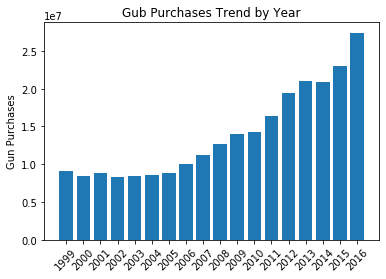

In [38]:
#Prepare dataframe
yearly_gun_purchases = df_g_1999_to_2016.groupby("yr")["totals"].sum().reset_index()
#Create bar chart
x = yearly_gun_purchases['yr']
y = yearly_gun_purchases['totals']

plt.xticks(x,rotation=45)
plt.ylabel("Gun Purchases")
plt.title("Gub Purchases Trend by Year")
plt.bar(x, y)

#### Answer: The bar chart shows an increase in gun purcharses. Particularly from 2006 to 2016, the number rises a lot.


### Research Question 2 (Is there any similarities differences of gun purchases in each month across years?)
#### I need small multiple for line chart to to see the similarities and differences of gun purchases in each year by month. Reference https://leancrew.com/all-this/2013/07/matplotlib-and-small-multiples/, https://python-graph-gallery.com/125-small-multiples-for-line-chart/

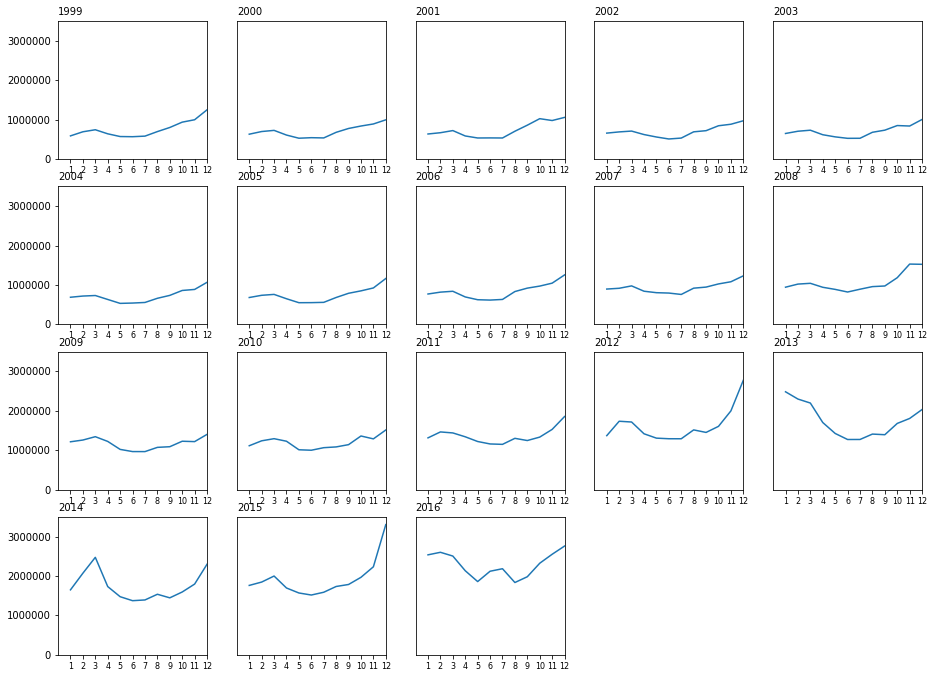

In [39]:
#Prepare dataframe with approperate format
ym_gun_purchases = df_g_1999_to_2016.groupby(["yr","mon"])["totals"].sum().reset_index()
ym_gun_purchases_pivot = ym_gun_purchases.pivot(index='mon', columns='yr', values='totals').reset_index()
#ym_gun_purchases_pivot

#Create small multiple line charts
num=0
for column in ym_gun_purchases_pivot.drop('mon', axis=1):
    num+=1

    # Find the right spot on the plot
    plt.subplot(4,5, num)
    plt.subplots_adjust(left=0.0, right=2.0, bottom=0.3, top=2.5)

    # Plot the lineplot
    plt.plot(ym_gun_purchases_pivot['mon'], ym_gun_purchases_pivot[column])
 
    # Same limits for everybody!
    plt.axis([0, 12, 0, 3500000])#max total in ym_gun_purchases_pivot is 3304540
    plt.xticks(range(1, 13, 1), fontsize=8)
    plt.yticks(range(0, 3500000, 1000000))
 
    # keep partial y ticks
    if num not in [1,6,11,16] :
        plt.yticks([])   
 
    # Add title
    plt.title(column, loc='left', fontsize=10, fontweight=0)



#### Answer: 1) As shown in each line chart, gun purchases in each year has similar trend at month level from 1999 to 2007, 2009 to 2011. 2) the trend is completed different since 2012, the volatility increased. 3) The similarity among each chart is that obvious peak of gun purchases happens on Mar and Dec.

 ### Research Question 3  (In 2016, What 're Top 3 states with the most purchased gun, and is the gun purchase related to the population in these states?)
> 1) use datafram df_g_2016_by_state_join_census contains only 2016 data. 2)I need to present data by state, create a figure by combining bar chart represeted the gun purchases, and line chart represented population estimated.

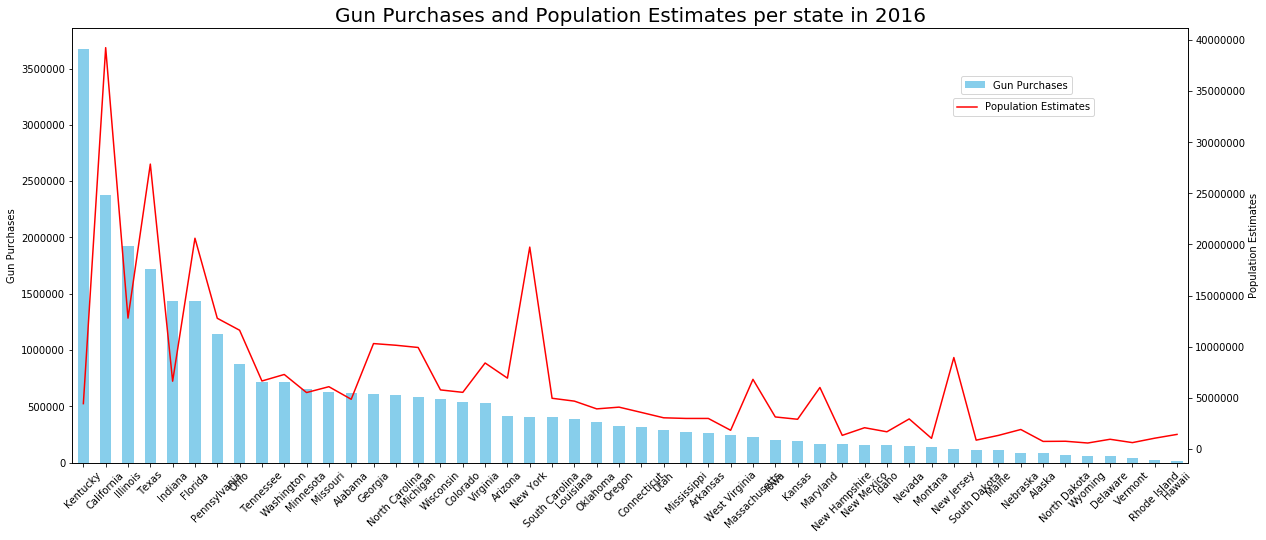

In [40]:
#Create bar chart
plt.figure(figsize=(20,8))
x = df_g_2016_by_state_join_census['state']
y1 = df_g_2016_by_state_join_census.totals
y2 = df_g_2016_by_state_join_census['Population estimates, July 1, 2016,  (V2016)']

ax1 = y1.plot(kind='bar', color='skyblue', label='Gun Purchases')
ax1.legend(bbox_to_anchor=(0.9,0.9))
ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), y2, linestyle='-', color='r', label='Population Estimates')
ax2.legend(bbox_to_anchor=(0.92,0.85))
ax1.set_xticklabels(x, rotation=45)

ax1.set_ylabel('Gun Purchases')
ax2.set_ylabel('Population Estimates')
plt.title('Gun Purchases and Population Estimates per state in 2016', fontsize=20)
plt.ticklabel_format(axis="y", style="plain", useLocale=False)
plt.show()




#### Answer: 1) Top 3 Most purchased gun in 2017: Kentucky, California, Illinois. 2) Population is not related to the gun purchases. The population in Kentucky is approx. 2 times lower than New York. But the number of gun purchases is almost 8 times higher than New York.

<a id='conclusions'></a>
## Conclusions

> This analysis shows me the trends of gun purchases from 1999 to 2016 at yearly level. The purchases keep increasing. Comparing gun purchase data in each month in each year, December has the most puchases in each year.

> When it comes to the relation between population and gun purchases of each state, the figure of question3 shows no evidence. It would be reasonable to consider other factors which impact the gun purchases, such as economie, gun control policy, employment.